In [1]:
import pandas as pd
import numpy  as np

In [2]:
df = pd.DataFrame()
rows = [29,86,80,166]
for j in range(1,33):
    if j == 24:
        continue
    data = pd.read_excel(f"./dataset/P{j}/val_aro.xls")
    extracted_rows = data.iloc[rows,:]
    df = pd.concat([df, extracted_rows], ignore_index=True)
df.head()

,image,Valence_score,Arousal_score
0,30,6,0
1,86,5,1
2,80,2,1
3,166,3,0
4,30,8,1


In [3]:
df['class'] = df['image'].apply(lambda x: "Pleasant" if x in [30, 86] else "unpleasant")
df.head()

,image,Valence_score,Arousal_score,class
0,30,6,0,Pleasant
1,86,5,1,Pleasant
2,80,2,1,unpleasant
3,166,3,0,unpleasant
4,30,8,1,Pleasant


In [4]:
df.drop("image",axis=1,inplace = True)

In [5]:
temp = df.groupby('class').mean()
meanVec = np.array(temp)
meanVec

array([[4.7027027 , 0.54054054],
       [4.56321839, 0.44827586]])

In [6]:
temp = df.groupby('class').std()
stdVec = np.array(temp)
stdVec

array([[2.35542948, 0.50522792],
       [2.33128944, 0.50020044]])

In [7]:
print("Distance:",np.linalg.norm(meanVec[0]-meanVec[1]))

Distance: 0.16723828556628706


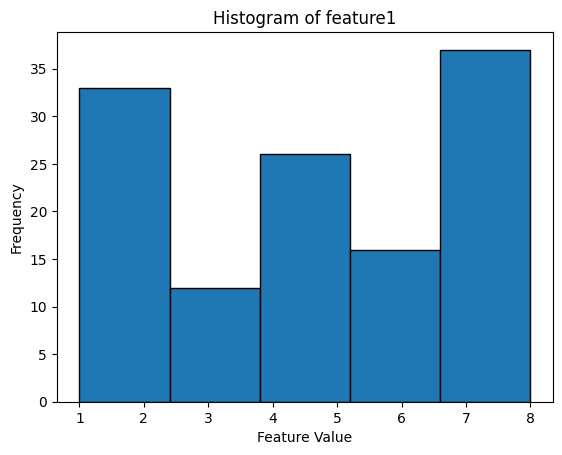

Mean of feature1: 4.604838709677419
Variance of feature1: 5.384170135275753


In [8]:
import matplotlib.pyplot as plt
feature = df['Valence_score']

# Generate the histogram data (bins can be adjusted as needed)
hist, bin_edges = np.histogram(feature, bins=5)

# Plot the histogram
plt.hist(feature, bins=5, edgecolor='black')
plt.title('Histogram of feature1')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and variance of the feature
mean = np.mean(feature)
variance = np.var(feature)

print("Mean of feature1:", mean)
print("Variance of feature1:", variance)

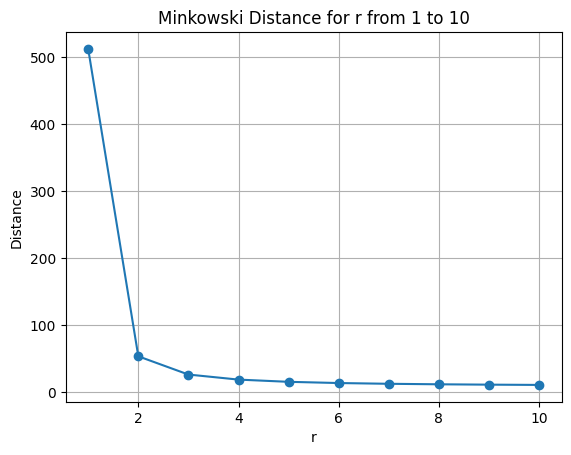

Minkowski distance with r=1: 512.0
Minkowski distance with r=2: 53.04714883949938
Minkowski distance with r=3: 25.815258486104234
Minkowski distance with r=4: 18.262957189232704
Minkowski distance with r=5: 14.944908410739307
Minkowski distance with r=6: 13.131869578986747
Minkowski distance with r=7: 12.008381467178484
Minkowski distance with r=8: 11.253282015960037
Minkowski distance with r=9: 10.716254047213877
Minkowski distance with r=10: 10.318090042347237


In [9]:
x = df['Valence_score'].values
y = df['Arousal_score'].values

# Calculate Minkowski distance for r from 1 to 10
distances = []
r_values = range(1, 11)

for r in r_values:
    distance = np.sum(np.abs(x - y) ** r) ** (1 / r)
    distances.append(distance)

# Plot the distances
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance for r from 1 to 10')
plt.xlabel('r')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Print the distances for each r
for r, dist in zip(r_values, distances):
    print(f"Minkowski distance with r={r}: {dist}")

In [10]:
from sklearn.model_selection import train_test_split
X = df[["Valence_score","Arousal_score"]].values
y = df["class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training data
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

0.5

In [12]:
# # Output the model's predictions for the test set
neigh.predict([X_test[0]])


array(['unpleasant'], dtype=object)

In [13]:
neigh = KNeighborsClassifier(n_neighbors=1)

# Train the classifier using the training data
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

0.47368421052631576

In [14]:
neigh.predict([X_test[0]])

array(['unpleasant'], dtype=object)

In [15]:
from sklearn.metrics import accuracy_score
# List to store accuracy for different values of k
accuracies = []

# Vary k from 1 to 11
k_values = range(1, 12)

for k in k_values:
    # Create and train the kNN classifier with the current k
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = neigh.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Accuracy with k={k}: {accuracy}")

Accuracy with k=1: 0.47368421052631576
Accuracy with k=2: 0.47368421052631576
Accuracy with k=3: 0.5
Accuracy with k=4: 0.5
Accuracy with k=5: 0.6842105263157895
Accuracy with k=6: 0.6052631578947368
Accuracy with k=7: 0.6578947368421053
Accuracy with k=8: 0.631578947368421
Accuracy with k=9: 0.6578947368421053
Accuracy with k=10: 0.631578947368421
Accuracy with k=11: 0.6578947368421053


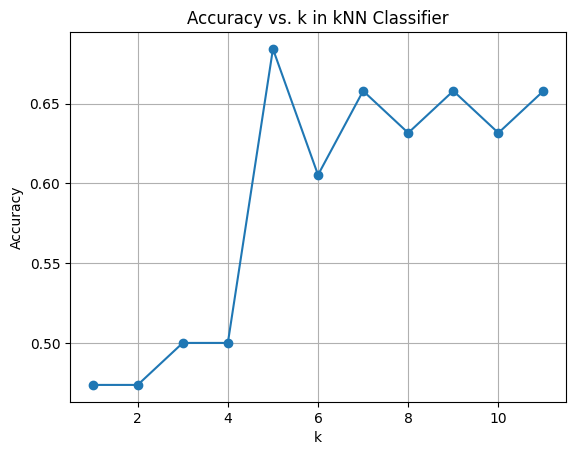

In [16]:
# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k in kNN Classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [18]:
# Create a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training data
neigh.fit(X_train, y_train)

# Predict on both training and testing sets
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

Confusion Matrix - Training Data:
 [[14 10]
 [13 49]]
Confusion Matrix - Test Data:
 [[ 5  8]
 [11 14]]

Classification Report - Training Data:
              precision    recall  f1-score   support

    Pleasant       0.52      0.58      0.55        24
  unpleasant       0.83      0.79      0.81        62

    accuracy                           0.73        86
   macro avg       0.67      0.69      0.68        86
weighted avg       0.74      0.73      0.74        86


Classification Report - Test Data:
              precision    recall  f1-score   support

    Pleasant       0.31      0.38      0.34        13
  unpleasant       0.64      0.56      0.60        25

    accuracy                           0.50        38
   macro avg       0.47      0.47      0.47        38
weighted avg       0.53      0.50      0.51        38



Text(627.9949494949494, 0.5, 'Actual')

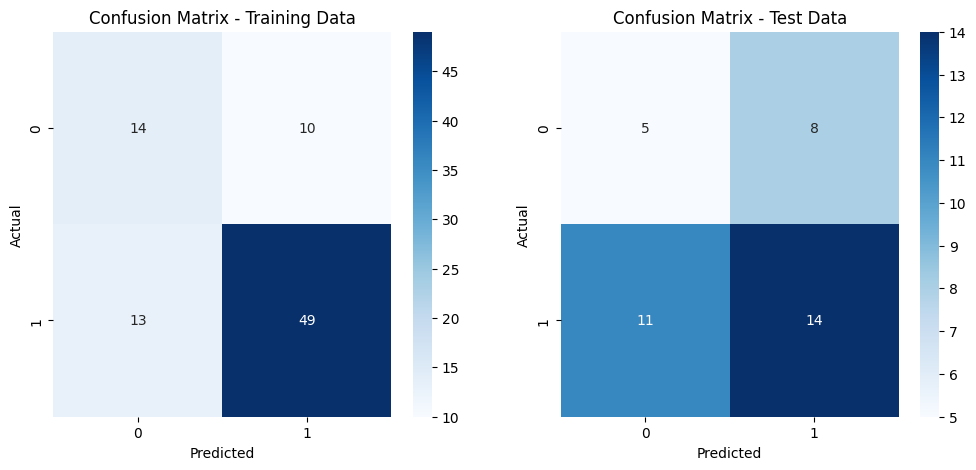

In [19]:
# Confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training Data:\n", cm_train)

# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix - Test Data:\n", cm_test)

# Calculate precision, recall, and F1-score for training data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Calculate precision, recall, and F1-score for test data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')